In [592]:
# importing needed libraries.
import re
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup  

In [70]:
# choosing the site url for scrapping the data.

url = "https://traveltriangle.com/tour-packages/india"

Problem Statement: Analysis on different types of Trip Packages.

In [36]:

page = requests.get(url)
page

<Response [200]>

In [255]:
# prettifying the text.
soup=BeautifulSoup(page.text)


In [61]:
a = []
for i in soup.find_all("ul",class_="package-tags at_package_tags"):
        j=re.sub(r'(?<!^)(?=[A-Z])', ' ', i.text)
        k=re.sub(r'(?<!^)(?=[A-Z])', ',', j)
        a.append("".join(k.split(",")[:6]))
a

['Hot  Pick Water  Activities Romantic  Cruise ',
 "Corbyn's  Beach  Cove Adventure Radhanagar  Beach ",
 'Sightseeing Nature Hill station Himalayas Romantic Hills ',
 'Coorg sightseeing Adventure Rajaâ\x80\x99s  Seat Nature Abbey  ',
 'Cellular  Jail Light &  Sound  Show Adventure ',
 'Hadimba  Temple Adventure Solang  Valley Nature ',
 '  Periyar  Wildlife  Sanctuary Cruises Eravikulam  ',
 "Family Dolphin spotting Cruises Kid's  Special Best sellers ",
 'River  Rafting Hill station Adventure Nature Trekking ',
 'Best- Selling Himalaya Hill station Road  Trip ',
 'Nature Road  Trip Adventure Campinglandscape Ideal for friends ',
 'Adventure Northeast Hill station Hills Nature Waterfallsshopping ',
 'Wildlife safari Adventure Backwaters Hill station Hills Houseboat ',
 'Kaziranga  National  Park Adventure Elephant  Safari ',
 'Pocket-friendly Cruises Scenic  Routes Hill station Private  ',
 'Beach vacation  Adventure Nightlife Nature Shopping Beach ',
 'Watersports Beach  Vacation Lig

- Now we scrapping  the data form site page  with RegEx.

In [316]:
Package_Name = []
Duration_Days = []
Duration_Nights = []
Discount_Percentage = []
Destination_Cities = []
Original_Price_INR = []
Deal_Price_INR = []
Hotel_Ratings = []
Included_Activities = []
for i in range(1,36):
    url = f"https://traveltriangle.com/tour-packages/india/page/{i}"
    page = requests.get(url)
    soup = BeautifulSoup(page.text)

    for i in soup.find_all("span",class_="fw9 m0 f16 pfc3"):
        Package_Name.append("".join(re.findall(r"^(.*?(?:Honeymoon|Package).*?|.*)",i.text)))
    for i in soup.find_all("span",class_="iblock sfc6"):
        Duration_Days.append("".join(re.findall(r"^\d+",i.text)))
    for i in soup.find_all("span",class_="iblock sfc6"):
        Duration_Nights.append("".join(re.findall(r"(\d+)\s+Nights",i.text)))
    for i in soup.find_all("span",class_="f12 fw4 pt2 pb2 pl8 pr8 radius20 pbc1 sfcw at_discount_label"):
        Discount_Percentage.append("".join(re.findall(r"^\d+",i.text)))
    for i in soup.find_all("span",class_="f12 pfc3 tdl ml8 at_oldprice fw4"):
        Original_Price_INR.append("".join(re.findall(r"\d+",i.text)))
    for i in soup.find_all("ul",class_="clearfix package-cities-list at_packagecity_list"):
        j=re.sub(r"\(\d+D\)",",",i.text)
        Destination_Cities.append("".join(re.findall(r"^.*(?=,[^,]*$)",j)))
    for i in soup.find_all("h4",class_="sfc3 m0 f24 fw9 priceVal at_newprice"):
        Deal_Price_INR.append("".join(re.findall(r"\d+",i.text)[0:2]))
    for i in soup.find_all("div",class_="clearfix row p8"):
        Hotel_Ratings.append("".join(re.findall(r"\d+",i.text)[0]))
    for i in soup.find_all("ul",class_="package-tags at_package_tags"):
        j=re.sub(r'(?<!^)(?=[A-Z])', ' ', i.text)
        k=re.sub(r'(?<!^)(?=[A-Z])', ',', j)
        Included_Activities.append("".join(k.split(",")[:6]))
        
Starting_Location = [i.split(',')[0].strip() for i in Destination_Cities]

In [328]:
Destination_Cities_Count = []
for i in Trips["Destination_Cities"]:
    Destination_Cities_Count.append(len(i.split(",")))
Destination_Cities_Count

[1,
 2,
 1,
 1,
 2,
 1,
 4,
 1,
 1,
 2,
 2,
 2,
 3,
 3,
 4,
 1,
 2,
 2,
 1,
 4,
 1,
 3,
 4,
 2,
 1,
 3,
 2,
 3,
 3,
 5,
 2,
 4,
 3,
 2,
 3,
 1,
 1,
 3,
 1,
 2,
 3,
 3,
 3,
 1,
 1,
 2,
 2,
 3,
 1,
 2,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 4,
 2,
 3,
 1,
 1,
 3,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 4,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 2,
 1,
 3,
 2,
 1,
 2,
 2,
 2,
 3,
 1,
 1,
 5,
 1,
 1,
 4,
 3,
 1,
 1,
 4,
 2,
 4,
 2,
 2,
 1,
 1,
 3,
 2,
 3,
 2,
 3,
 1,
 2,
 1,
 3,
 4,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 4,
 4,
 4,
 1,
 1,
 1,
 4,
 5,
 2,
 3,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 3,
 5,
 3,
 1,
 3,
 3,
 1,
 1,
 5,
 1,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 4,
 3,
 3,
 2,
 3,
 5,
 2,
 1,
 1,
 8,
 2,
 2,
 1,
 3,
 4,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 7,
 2,
 1,
 3,
 1,
 2,
 4,
 1,
 1,
 2,
 7,
 1,
 4,
 1,
 4,
 1,
 4,
 5,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,


# The columns of Dataset

- Package_Type: Type of package being offered.

- Duration_Days: Number of days included in the package.

- Duration_Nights: Number of nights included in the package.

- Starting_Location: Starting point of the trip.

- Destination_Cities: Cities included in the trip itinerary.

- Included_Activities: Activities included in the package.

- Hotel_Ratings: Ratings of the hotel(s) included in the package stay.

- Original_Price_INR: Original price of the package (in INR).

- Deal_Price_INR: Deal price of the package (in INR).

- Discount_Percentage: Percentage discount offered on the package.


In [329]:
Trips=pd.DataFrame({"Package_Type":Package_Name,
              "Duration_Days":Duration_Days,
              "Duration_Nights":Duration_Nights,
              "Starting_Location":Starting_Location,
              "Destination_Cities":Destination_Cities,
              "Destination_Cities_Count":Destination_Cities_Count,
              "Included_Activities":Included_Activities,
              "Hotel_Ratings":Hotel_Ratings,
              "Original_Price_INR":Original_Price_INR,
              "Deal_Price_INR":Deal_Price_INR,
              "Discount_Percentage":Discount_Percentage
              })

In [600]:
Trips

,Package_Type,Duration_Days,Duration_Nights,Starting_Location,Destination_Cities,Destination_Cities_Count,Included_Activities,Hotel_Ratings,Original_Price_INR,Deal_Price_INR,Discount_Percentage
0,Most Reasonable Goa Honeymoon,5,4,Goa,Goa,1,Hot Pick Water Activities Romantic Cruise,2,12571,11000,12
1,Fantastic Andaman Honeymoon,5,4,Port Blair,"PortBlair,Havelock",2,Corbyn's Beach Cove Adventure Radhanagar Be...,3,18811,15599,17
2,Romantic Mussoorie Tour Package,3,2,Mussoorie,Mussoorie,1,Sightseeing Nature Hill station Himalayas Roma...,3,12000,10500,13
3,Coorg Package,3,2,Coorg,Coorg,1,Coorg sightseeing Adventure Rajas Seat Nature...,3,17802,16200,9
4,Best Andaman Sightseeing Tour Package,5,4,Port Blair,"PortBlair,Havelock",2,Cellular Jail Light & Sound Show Adventure,3,36484,33200,9
...,...,...,...,...,...,...,...,...,...,...,...
870,Golden Triangle Tour Package,2,1,New Delhi,NewDelhi,1,Adventure Nature Religious Budget,3,11702,11000,6
871,Alluring Assam Sightseeing Tour Package,6,5,Kaziranga,"Kaziranga,Shillong,Guwahati",3,Sightseeing Historical Kaziranga National Pa...,2,31318,28499,9
872,Top-Selling Chennai Sightseeing Package,3,2,Chennai,"Chennai,Mahabalipuram",2,Temple Religiousart gallery Historical Marina ...,3,16959,15433,9
873,Spectacular Shillong Holiday Package,3,2,Shillong,Shillong,1,Sightseeing Nature Temples Adventure Hills Hil...,3,13736,12500,9


In [134]:
# checking the dataset is properorder or not.
Trips.head(10)

,Package_Type,Duration_Days,Duration_Nights,Starting_Location,Destination_Cities,Included_Activities,Hotel_Ratings,Original_Price_INR,Deal_Price_INR,Discount_Percentage
0,Most Reasonable Goa Honeymoon,5,4,Goa,Goa,Hot Pick Water Activities Romantic Cruise,2,12571,11000,12
1,Fantastic Andaman Honeymoon,5,4,Port Blair,"Port Blair ,Havelock",Corbyn's Beach Cove Adventure Radhanagar Be...,3,18811,15599,17
2,Romantic Mussoorie Tour Package,3,2,Mussoorie,Mussoorie,Sightseeing Nature Hill station Himalayas Roma...,3,12000,10500,13
3,Coorg Package,3,2,Coorg,Coorg,Coorg sightseeing Adventure Rajaâs Seat Nat...,3,17802,16200,9
4,Best 4N 5D Andaman Sightseeing Tour Package,5,4,Port Blair,"Port Blair ,Havelock",Cellular Jail Light & Sound Show Adventure,3,36484,33200,9
5,Mesmerising Manali Trip Package,3,2,Manali,Manali,Hadimba Temple Adventure Solang Valley Nature,3,10440,9500,9
6,Hills & Houseboat: Munnar and Alleppey Honeymoon,6,5,Munnar,"Munnar ,Thekkady ,Alleppey ,Kochi",Periyar Wildlife Sanctuary Cruises Eraviku...,3,23644,21280,10
7,Top Family Holiday Package,5,4,Calangute,Calangute,Family Dolphin spotting Cruises Kid's Special...,3,15217,14000,8
8,Most Affordable 1 Night 2 Days Uttarakhand Tou...,2,1,Rishikesh,Rishikesh,River Rafting Hill station Adventure Nature T...,2,3360,2800,17
9,Top 4 Nights 5 Days Best-Selling Sikkim Gangto...,5,4,Gangtok,"Gangtok ,Darjeeling",Best- Selling Himalaya Hill station Road Trip,3,22956,19233,16


In [331]:
# Cleaning the package type column
Trips['Package_Type'] = Trips['Package_Type'].apply(lambda x: re.sub(r'\d+|Nights|Days|N|D', '', x))
Trips

,Package_Type,Duration_Days,Duration_Nights,Starting_Location,Destination_Cities,Destination_Cities_Count,Included_Activities,Hotel_Ratings,Original_Price_INR,Deal_Price_INR,Discount_Percentage
0,Most Reasonable Goa Honeymoon,5,4,Goa,Goa,1,Hot Pick Water Activities Romantic Cruise,2,12571,11000,12
1,Fantastic Andaman Honeymoon,5,4,Port Blair,"Port Blair ,Havelock",2,Corbyn's Beach Cove Adventure Radhanagar Be...,3,18811,15599,17
2,Romantic Mussoorie Tour Package,3,2,Mussoorie,Mussoorie,1,Sightseeing Nature Hill station Himalayas Roma...,3,12000,10500,13
3,Coorg Package,3,2,Coorg,Coorg,1,Coorg sightseeing Adventure Rajaâs Seat Nat...,3,17802,16200,9
4,Best Andaman Sightseeing Tour Package,5,4,Port Blair,"Port Blair ,Havelock",2,Cellular Jail Light & Sound Show Adventure,3,36484,33200,9
...,...,...,...,...,...,...,...,...,...,...,...
870,Golden Triangle Tour Package,2,1,New Delhi,New Delhi,1,Adventure Nature Religious Budget,3,11702,11000,6
871,Alluring Assam Sightseeing Tour Package,6,5,Kaziranga,"Kaziranga ,Shillong ,Guwahati",3,Sightseeing Historical Kaziranga National Pa...,2,31318,28499,9
872,Top-Selling Chennai Sightseeing Package,3,2,Chennai,"Chennai ,Mahabalipuram",2,Temple Religiousart gallery Historical Marina ...,3,16959,15433,9
873,Spectacular Shillong Holiday Package,3,2,Shillong,Shillong,1,Sightseeing Nature Temples Adventure Hills Hil...,3,13736,12500,9


In [332]:
# Saving the data set into csv file.
Trips.to_csv(r"Trips_Packages.csv")

In [333]:
Trips=pd.read_csv(r"Trips_Packages.csv")
Trips

,Unnamed: 0,Package_Type,Duration_Days,Duration_Nights,Starting_Location,Destination_Cities,Destination_Cities_Count,Included_Activities,Hotel_Ratings,Original_Price_INR,Deal_Price_INR,Discount_Percentage
0,0,Most Reasonable Goa Honeymoon,5,4,Goa,Goa,1,Hot Pick Water Activities Romantic Cruise,2,12571,11000,12
1,1,Fantastic Andaman Honeymoon,5,4,Port Blair,"Port Blair ,Havelock",2,Corbyn's Beach Cove Adventure Radhanagar Be...,3,18811,15599,17
2,2,Romantic Mussoorie Tour Package,3,2,Mussoorie,Mussoorie,1,Sightseeing Nature Hill station Himalayas Roma...,3,12000,10500,13
3,3,Coorg Package,3,2,Coorg,Coorg,1,Coorg sightseeing Adventure Rajaâs Seat Nat...,3,17802,16200,9
4,4,Best Andaman Sightseeing Tour Package,5,4,Port Blair,"Port Blair ,Havelock",2,Cellular Jail Light & Sound Show Adventure,3,36484,33200,9
...,...,...,...,...,...,...,...,...,...,...,...,...
870,870,Golden Triangle Tour Package,2,1,New Delhi,New Delhi,1,Adventure Nature Religious Budget,3,11702,11000,6
871,871,Alluring Assam Sightseeing Tour Package,6,5,Kaziranga,"Kaziranga ,Shillong ,Guwahati",3,Sightseeing Historical Kaziranga National Pa...,2,31318,28499,9
872,872,Top-Selling Chennai Sightseeing Package,3,2,Chennai,"Chennai ,Mahabalipuram",2,Temple Religiousart gallery Historical Marina ...,3,16959,15433,9
873,873,Spectacular Shillong Holiday Package,3,2,Shillong,Shillong,1,Sightseeing Nature Temples Adventure Hills Hil...,3,13736,12500,9


In [334]:
# Droping the Unnamed: 0  co1lumn
Trips.drop("Unnamed: 0",axis=1,inplace= True)

In [335]:
Trips

,Package_Type,Duration_Days,Duration_Nights,Starting_Location,Destination_Cities,Destination_Cities_Count,Included_Activities,Hotel_Ratings,Original_Price_INR,Deal_Price_INR,Discount_Percentage
0,Most Reasonable Goa Honeymoon,5,4,Goa,Goa,1,Hot Pick Water Activities Romantic Cruise,2,12571,11000,12
1,Fantastic Andaman Honeymoon,5,4,Port Blair,"Port Blair ,Havelock",2,Corbyn's Beach Cove Adventure Radhanagar Be...,3,18811,15599,17
2,Romantic Mussoorie Tour Package,3,2,Mussoorie,Mussoorie,1,Sightseeing Nature Hill station Himalayas Roma...,3,12000,10500,13
3,Coorg Package,3,2,Coorg,Coorg,1,Coorg sightseeing Adventure Rajaâs Seat Nat...,3,17802,16200,9
4,Best Andaman Sightseeing Tour Package,5,4,Port Blair,"Port Blair ,Havelock",2,Cellular Jail Light & Sound Show Adventure,3,36484,33200,9
...,...,...,...,...,...,...,...,...,...,...,...
870,Golden Triangle Tour Package,2,1,New Delhi,New Delhi,1,Adventure Nature Religious Budget,3,11702,11000,6
871,Alluring Assam Sightseeing Tour Package,6,5,Kaziranga,"Kaziranga ,Shillong ,Guwahati",3,Sightseeing Historical Kaziranga National Pa...,2,31318,28499,9
872,Top-Selling Chennai Sightseeing Package,3,2,Chennai,"Chennai ,Mahabalipuram",2,Temple Religiousart gallery Historical Marina ...,3,16959,15433,9
873,Spectacular Shillong Holiday Package,3,2,Shillong,Shillong,1,Sightseeing Nature Temples Adventure Hills Hil...,3,13736,12500,9


In [336]:
# information of the DataFrame
Trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875 entries, 0 to 874
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Package_Type              875 non-null    object
 1   Duration_Days             875 non-null    int64 
 2   Duration_Nights           875 non-null    int64 
 3   Starting_Location         875 non-null    object
 4   Destination_Cities        875 non-null    object
 5   Destination_Cities_Count  875 non-null    int64 
 6   Included_Activities       875 non-null    object
 7   Hotel_Ratings             875 non-null    int64 
 8   Original_Price_INR        875 non-null    int64 
 9   Deal_Price_INR            875 non-null    int64 
 10  Discount_Percentage       875 non-null    int64 
dtypes: int64(7), object(4)
memory usage: 75.3+ KB


# checking null values

In [337]:
# Here all columns have 0 missing values.
Trips.isna().sum()

Package_Type                0
Duration_Days               0
Duration_Nights             0
Starting_Location           0
Destination_Cities          0
Destination_Cities_Count    0
Included_Activities         0
Hotel_Ratings               0
Original_Price_INR          0
Deal_Price_INR              0
Discount_Percentage         0
dtype: int64

In [338]:
#1st catagorical column

# checking invalid values and special characters.

In [339]:
Trips["Package_Type"].replace("  ","",inplace=True)

In [340]:
package_Type=Trips["Package_Type"].tolist()

In [620]:
word_replacements = {
    "  ":"",
    "arjeeling": "Darjeeling",
    "haramshala": "Dharamshala",
    "warka": "Dwarka",
    "epal": "Nepal",
    "elhi": "Delhi",
    "ainital": "Nainital",
    "hanaulti": "Dhanaulti",
    "orth": "North",
    "o ham": "Dho Dham",
    "ational": "National",
    "ham":"Dham"
}

modified_tour_packages = []
for package in package_Type:

    for old_word, new_word in word_replacements.items():
        package = package.replace(old_word, new_word)
    modified_tour_packages.append(package)

modified_tour_packages

['Most Reasonable Goa Honeymoon',
 'Fantastic Andaman Honeymoon',
 'Romantic Mussoorie Tour Package',
 'Coorg Package',
 'Best Andaman Sightseeing Tour Package',
 'Mesmerising Manali Trip Package',
 'Hills & Houseboat: Munnar and Alleppey Honeymoon',
 'Top Family Holiday Package',
 'Most Affordableight Uttarakhand Tour Package',
 'Top Best-Selling Sikkim Gangtok Darjeeling Tour Package',
 'Bestightay Leh Ladakh Tour Package',
 'Postcard-Perfect Sikkim Gangtok Lachung Honeymoon',
 'Best Selling Kerala Houseboat & Jungle Safari Tour Package',
 'Go on an excursion to Shillong to witness the best of natural attraction',
 'Top Kerala Family Tour Package',
 'Exciting Goa Tour Package',
 'iscover Our Beautiful Andaman Family Tour Package',
 'Sikkim Family Tour Package',
 'Best Selling Shimla Honeymoon',
 'Jammu Kashmir Family Package',
 'Udaipur: More Than The Just â\x80\x9cThe City Of Lakesâ\x80\x9d',
 'An Amazingly Romantic Honeymoon',
 'Idyllic Kerala Houseboat & Hills Family Package',
 'A

In [621]:
new_package_Type=[]

for i in modified_tour_packages:
    if i[0].islower():
        new_package_Type.append(((" ".join(i.split()[-4:]))))
    else:
        new_package_Type.append(i)
        
len(new_package_Type)

875

In [622]:
new_packages1=[]
for i in new_package_Type:
    if i[0]==" ":
        new_packages1.append(i[1:])
    else:
        new_packages1.append(i)
new_packages1

['Most Reasonable Goa Honeymoon',
 'Fantastic Andaman Honeymoon',
 'Romantic Mussoorie Tour Package',
 'Coorg Package',
 'Best Andaman Sightseeing Tour Package',
 'Mesmerising Manali Trip Package',
 'Hills & Houseboat: Munnar and Alleppey Honeymoon',
 'Top Family Holiday Package',
 'Most Affordableight Uttarakhand Tour Package',
 'Top Best-Selling Sikkim Gangtok Darjeeling Tour Package',
 'Bestightay Leh Ladakh Tour Package',
 'Postcard-Perfect Sikkim Gangtok Lachung Honeymoon',
 'Best Selling Kerala Houseboat & Jungle Safari Tour Package',
 'Go on an excursion to Shillong to witness the best of natural attraction',
 'Top Kerala Family Tour Package',
 'Exciting Goa Tour Package',
 'Andaman Family Tour Package',
 'Sikkim Family Tour Package',
 'Best Selling Shimla Honeymoon',
 'Jammu Kashmir Family Package',
 'Udaipur: More Than The Just â\x80\x9cThe City Of Lakesâ\x80\x9d',
 'An Amazingly Romantic Honeymoon',
 'Idyllic Kerala Houseboat & Hills Family Package',
 'Adventurous Family Holi

In [623]:
Trips["Package_Type"]=new_packages1


In [624]:
list1=Trips["Package_Type"].tolist()
pattern = r'[^a-zA-Z0-9:\s-]'

# Find invalid values in the list using regex

invalid_values1 = []
for i in list1:
    invalid_values1.append("".join((re.findall(pattern, i))))
print(invalid_values1)


['', '', '', '', '', '', '&', '', '', '', '', '', '&', '', '', '', '', '', '', '', 'â\x80\x9câ\x80\x9d', '', '&', '', '', '', '', '', '', '', '', '', ',', '', '', '', '', '', '', '&', '', '', '', '', '', '', '', '&', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ',&', '', '', '', '', ',', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ',,', '', '', '', '', '', '', '', '', '', 'â\x80\x99,', '', '', '', '', '', '', '', '', '', '', '', '', '', '&', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ',&', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '&', '', '', '', '', '', '', '', '', '', '', '', '&', '', '', '', '', '', '', '', '', '', '', '', '',

In [625]:
# Replacing the invalid values with empty string.

list_Package_Type = []

for i in Trips["Package_Type"]:
    list_Package_Type.append(re.sub(r"â\x80\x9d","",i))
    
Trips["Package_Type"] = list_Package_Type

list_Package_Type1 = []

for i in Trips["Package_Type"]:
    list_Package_Type1.append(re.sub(r"â\x80\x9c","",i))

Trips["Package_Type"] = list_Package_Type1


list_Package_Type2 = []


for i in Trips["Package_Type"]:
    list_Package_Type2.append(re.sub(r"â\x80\x99","",i))

Trips["Package_Type"] = list_Package_Type2


In [626]:
list1=Trips["Package_Type"].tolist()
pattern = r'[^a-zA-Z0-9:\s-]'

# Find invalid values in the list using regex

invalid_values1 = []
for i in list1:
    invalid_values1.append("".join((re.findall(pattern, i))))
print(invalid_values1)

['', '', '', '', '', '', '&', '', '', '', '', '', '&', '', '', '', '', '', '', '', '', '', '&', '', '', '', '', '', '', '', '', '', ',', '', '', '', '', '', '', '&', '', '', '', '', '', '', '', '&', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ',&', '', '', '', '', ',', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ',,', '', '', '', '', '', '', '', '', '', ',', '', '', '', '', '', '', '', '', '', '', '', '', '', '&', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ',&', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '&', '', '', '', '', '', '', '', '', '', '', '', '&', '', '', '', '', '', '', '', '', '', '', '', '', '', ',&', '', '', '', '&',

In [627]:
Trips[Trips["Package_Type"].str.contains("&")]

,Package_Type,Duration_Days,Duration_Nights,Starting_Location,Destination_Cities,Destination_Cities_Count,Included_Activities,Hotel_Ratings,Original_Price_INR,Deal_Price_INR,Discount_Percentage
6,Hills & Houseboat: Munnar and Alleppey Honeymoon,6,5,Munnar,"Munnar,Thekkady,Alleppey,Kochi",4,Periyar Wildlife Sanctuary Cruises Eravikulam,3,23644,21280,10
12,Best Selling Kerala Houseboat & Jungle Safari Tour Package,5,4,Munnar,"Munnar,Thekkady,Alleppey",3,Wildlife safari Adventure Backwaters Hill station Hills Houseboat,3,21993,17920,19
22,Idyllic Kerala Houseboat & Hills Family Package,7,6,Munnar,"Munnar,Thekkady,Alleppey,Kovalam",4,Adventure Sightseeing Nature Family Waterfall Wildlife,3,30249,25460,16
39,Exotic Gangtok & Darjeeling Honeymoon,5,4,Darjeeling,"Darjeeling,Gangtok",2,Honeymoon freebies Adventure Himalayas Nature Tea gardens Hill station,3,52512,45663,13
47,Magical Darjeeling & Sikkim Summer Special Honeymoon,6,5,Darjeeling,"Darjeeling,Gangtok,Lachung",3,Honeymoon freebies Nature Himalayas Hill station Adventure Romantic,3,64004,56167,12
74,"Gangtok, Lachung & Darjeeling Summer Special Tour: The North Eastern Bliss",7,6,Gangtok,"Gangtok,Lachen,Lachung,Darjeeling",4,Hot Pick Adventure Pocket-friendly Nature Nature walks,3,67710,62399,8
123,Mesmerizing Kerala Holiday: Weekend in Munnar & Thekkady,4,3,Munnar,"Munnar,Thekkady",2,Hills Adventure Jungle Safari Nature Wildlife,3,18434,13167,29
179,"Idyllic Sikkim, Gangtok & Darjeeling Family Package",6,5,Darjeeling,"Darjeeling,Gangtok,Lachung",3,Adventure Historical Hill Station Road Trip,3,60211,54477,10
214,Fun-Packed Goa Weekend Holiday: South Goa & Beaches,3,2,Goa,Goa,1,Shopping Cruises Beach hopping Historical Weekend Special,3,17255,14999,13
226,Fun & Frolic Kodaikanal Ooty Tour Package,6,5,Ootacamund,"Ootacamund,Kodaikanal,Kodai",3,Wildlife Lakes Hills Lakes & Waterfalls Wildlife safari,3,23461,21350,9


In [628]:
Trips["Package_Type"].replace("Of Shimla & Manali"," Tour Of Shimla & Manali",inplace=True)

In [629]:
Trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875 entries, 0 to 874
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Package_Type              875 non-null    object
 1   Duration_Days             875 non-null    int64 
 2   Duration_Nights           875 non-null    int64 
 3   Starting_Location         875 non-null    object
 4   Destination_Cities        875 non-null    object
 5   Destination_Cities_Count  875 non-null    int64 
 6   Included_Activities       875 non-null    object
 7   Hotel_Ratings             875 non-null    int64 
 8   Original_Price_INR        875 non-null    int64 
 9   Deal_Price_INR            875 non-null    int64 
 10  Discount_Percentage       875 non-null    int64 
dtypes: int64(7), object(4)
memory usage: 75.3+ KB


In [630]:
# 2nd columns of catagorical.
Trips["Starting_Location"].unique()

array(['Goa', 'Port Blair', 'Mussoorie', 'Coorg', 'Manali', 'Munnar',
       'Calangute', 'Rishikesh', 'Gangtok', 'Leh', 'Kaziranga', 'Shimla',
       'Katra', 'Udaipur', 'Ooty', 'Srinagar', 'Cochin', 'Guwahati',
       'Jaipur', 'Darjeeling', 'Lansdowne', 'Kochi', 'Pahalgam',
       'Mount Abu', 'Jim Corbett', 'Wayanad', 'Pelling', 'Mahabaleshwar',
       'Kodaikanal', 'Ranthambore', 'Lonavala', 'Jaisalmer', 'Shillong',
       'Alleppey', 'Kasol', 'Dalhousie', 'Athirapally', 'Haridwar',
       'Jodhpur', 'Kumarakom', 'New Delhi', 'Auli', 'Chikmagalur',
       'Tirupati', 'Mcleodganj', 'Ootacamund', 'Candolim', 'Vaikom',
       'Pachmarhi', 'Dehradun', 'Calicut', 'Mumbai', 'Madurai', 'Shirdi',
       'Jamnagar', 'Dharamshala', 'Dwarka', 'Mysore', 'Ahmedabad', 'Bhuj',
       'Bhalukpong', 'Puri', 'Nainital', 'Kovalam', 'Sasan Gir', 'Agra',
       'Cherrapunjee', 'sariska', 'Hyderabad', 'Kasauli', 'Kanyakumari',
       'Amritsar', 'Kaziranga National Park', 'Bhubaneshwar', 'Matheran',
  

In [352]:
# 3rd catagorical column.
Trips["Destination_Cities"].unique()

array(['Goa ', 'Port Blair ,Havelock ', 'Mussoorie ', 'Coorg ', 'Manali ',
       'Munnar ,Thekkady ,Alleppey ,Kochi ', 'Calangute ', 'Rishikesh ',
       'Gangtok ,Darjeeling ', 'Leh ,Nubra Valley ', 'Gangtok ,Lachung ',
       'Munnar ,Thekkady ,Alleppey ', 'Kaziranga ,Shillong ,Guwahati ',
       'Shimla ', 'Katra ,Pahalgam ,Srinagar ,Gulmarg ', 'Udaipur ',
       'Coorg ,Ooty ,Kodaikanal ', 'Munnar ,Thekkady ,Alleppey ,Kovalam ',
       'Coorg ,Mysore ', 'Ooty ', 'Srinagar ,Gulmarg ,Pahalgam ',
       'Cochin ,Munnar ', 'Guwahati ,Shillong ,Cherrapunjee ',
       'Leh ,Nubra Valley ,Pangong ',
       'Jaipur ,Bikaner ,Jaisalmer ,Jodhpur ,Udaipur ', 'Leh ,Hunder ',
       'Shimla ,Manali ,Dharamshala ,Dalhousie ',
       'Gangtok ,Kalimpong ,Darjeeling ',
       'Port Blair ,Havelock ,Neil Island ', 'Leh ',
       'Darjeeling ,Gangtok ', 'Manali ,Kaza ,Chandra Tal ',
       'Mussoorie ,Jim Corbett ,Nainital ', 'Lansdowne ', 'Port Blair ',
       'Munnar ,Alleppey ', 'Kochi ,Munnar '

In [353]:
Trips["Destination_Cities"] = Trips["Destination_Cities"].str.replace(" ,",", ").str.replace(" ","")

In [354]:
Trips["Destination_Cities"].unique()

array(['Goa', 'PortBlair,Havelock', 'Mussoorie', 'Coorg', 'Manali',
       'Munnar,Thekkady,Alleppey,Kochi', 'Calangute', 'Rishikesh',
       'Gangtok,Darjeeling', 'Leh,NubraValley', 'Gangtok,Lachung',
       'Munnar,Thekkady,Alleppey', 'Kaziranga,Shillong,Guwahati',
       'Shimla', 'Katra,Pahalgam,Srinagar,Gulmarg', 'Udaipur',
       'Coorg,Ooty,Kodaikanal', 'Munnar,Thekkady,Alleppey,Kovalam',
       'Coorg,Mysore', 'Ooty', 'Srinagar,Gulmarg,Pahalgam',
       'Cochin,Munnar', 'Guwahati,Shillong,Cherrapunjee',
       'Leh,NubraValley,Pangong',
       'Jaipur,Bikaner,Jaisalmer,Jodhpur,Udaipur', 'Leh,Hunder',
       'Shimla,Manali,Dharamshala,Dalhousie',
       'Gangtok,Kalimpong,Darjeeling', 'PortBlair,Havelock,NeilIsland',
       'Leh', 'Darjeeling,Gangtok', 'Manali,Kaza,ChandraTal',
       'Mussoorie,JimCorbett,Nainital', 'Lansdowne', 'PortBlair',
       'Munnar,Alleppey', 'Kochi,Munnar', 'Darjeeling,Gangtok,Lachung',
       'Pahalgam,Srinagar,Gulmarg', 'Ooty,Kodaikanal', 'MountAbu',

In [355]:
# 4th catagorical column 
Trips["Included_Activities"].unique()

array(['Hot  Pick Water  Activities Romantic  Cruise ',
       "Corbyn's  Beach  Cove Adventure Radhanagar  Beach ",
       'Sightseeing Nature Hill station Himalayas Romantic Hills ',
       'Coorg sightseeing Adventure Rajaâ\x80\x99s  Seat Nature Abbey  ',
       'Cellular  Jail Light &  Sound  Show Adventure ',
       'Hadimba  Temple Adventure Solang  Valley Nature ',
       '  Periyar  Wildlife  Sanctuary Cruises Eravikulam  ',
       "Family Dolphin spotting Cruises Kid's  Special Best sellers ",
       'River  Rafting Hill station Adventure Nature Trekking ',
       'Best- Selling Himalaya Hill station Road  Trip ',
       'Nature Road  Trip Adventure Campinglandscape Ideal for friends ',
       'Adventure Northeast Hill station Hills Nature Waterfallsshopping ',
       'Wildlife safari Adventure Backwaters Hill station Hills Houseboat ',
       'Kaziranga  National  Park Adventure Elephant  Safari ',
       'Pocket-friendly Cruises Scenic  Routes Hill station Private  ',
      

In [356]:
list2=Trips["Included_Activities"].tolist()
pattern = r'[^a-zA-Z0-9:\s-]'

# Find invalid values in the list using regex
invalid_values2 = []
for i in list2:
    invalid_values2.append("".join((re.findall(pattern, i))))
print(invalid_values2)


['', "'", '', 'â\x80\x99', '&', '', '', "'", '', '', '', '', '', '', '', '', '&', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '/', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '.', '', '', '', '', '', '', '', '', '&', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',

In [357]:
# Replacing the invalid values with empty string.
list_Package_Type3 = []


for i in Trips["Included_Activities"]:
    list_Package_Type3.append(re.sub(r"â\x80\x99","",i))

Trips["Included_Activities"] = list_Package_Type3


In [358]:

list2=Trips["Included_Activities"].tolist()
pattern = r'[^a-zA-Z0-9:\s-]'

# Find invalid values in the list using regex

invalid_values2 = []
for i in list2:
    invalid_values2.append("".join((re.findall(pattern, i))))
print(invalid_values1)

['', '', '', '', '', '', '&', '', '', '', '', '', '&', '', '', '', '', '', '', '', '', '', '&', '', '', '', '', '', '', '', '', '', ',', '', '', '', '', '', '', '&', '', '', '', '', '', '', '', '&', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ',&', '', '', '', '', ',', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ',,', '', '', '', '', '', '', '', '', '', ',', '', '', '', '', '', '', '', '', '', '', '', '', '', '&', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ',&', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '&', '', '', '', '', '', '', '', '', '', '', '', '&', '', '', '', '', '', '', '', '', '', '', '', '', '', ',&', '', '', '', '&',

In [359]:
# now done with cleaning   of Catagorical columns.

In [360]:
Trips[Trips["Included_Activities"].str.contains("&")]

,Package_Type,Duration_Days,Duration_Nights,Starting_Location,Destination_Cities,Destination_Cities_Count,Included_Activities,Hotel_Ratings,Original_Price_INR,Deal_Price_INR,Discount_Percentage
4,Best Andaman Sightseeing Tour Package,5,4,Port Blair,"PortBlair,Havelock",2,Cellular Jail Light & Sound Show Adventure,3,36484,33200,9
16,Andaman Family Tour Package,5,4,Port Blair,"PortBlair,Havelock",2,Watersports Beach Vacation Light & Sound Show,2,23574,18990,19
226,Fun & Frolic Kodaikanal Ooty Tour Package,6,5,Ootacamund,"Ootacamund,Kodaikanal,Kodai",3,Wildlife Lakes Hills Lakes & Waterfalls Wildl...,3,23461,21350,9
562,Chennai Honeymoon,2,1,Mahabalipuram,Mahabalipuram,1,Caves Adventure Krishna temple Nature Art & A...,3,12535,11407,9


In [718]:
Trips

,Package_Type,Duration_Days,Duration_Nights,Starting_Location,Destination_Cities,Destination_Cities_Count,Included_Activities,Hotel_Ratings,Original_Price_INR,Deal_Price_INR,Discount_Percentage
0,Most Reasonable Goa Honeymoon,5,4,Goa,Goa,1,Hot Pick Water Activities Romantic Cruise,2,12571,11000,12
1,Fantastic Andaman Honeymoon,5,4,Port Blair,"PortBlair,Havelock",2,Corbyn's Beach Cove Adventure Radhanagar Beach,3,18811,15599,17
2,Romantic Mussoorie Tour Package,3,2,Mussoorie,Mussoorie,1,Sightseeing Nature Hill station Himalayas Romantic Hills,3,12000,10500,13
3,Coorg Package,3,2,Coorg,Coorg,1,Coorg sightseeing Adventure Rajas Seat Nature Abbey,3,17802,16200,9
4,Best Andaman Sightseeing Tour Package,5,4,Port Blair,"PortBlair,Havelock",2,Cellular Jail Light & Sound Show Adventure,3,36484,33200,9
...,...,...,...,...,...,...,...,...,...,...,...
870,Golden Triangle Tour Package,2,1,New Delhi,NewDelhi,1,Adventure Nature Religious Budget,3,11702,11000,6
871,Alluring Assam Sightseeing Tour Package,6,5,Kaziranga,"Kaziranga,Shillong,Guwahati",3,Sightseeing Historical Kaziranga National Park Adventure,2,31318,28499,9
872,Top-Selling Chennai Sightseeing Package,3,2,Chennai,"Chennai,Mahabalipuram",2,Temple Religiousart gallery Historical Marina Beach Sightseeing,3,16959,15433,9
873,Spectacular Shillong Holiday Package,3,2,Shillong,Shillong,1,Sightseeing Nature Temples Adventure Hills Hill station,3,13736,12500,9


In [720]:
Trips.to_csv("Trips_after_cleaning.csv")

# Dealing with Duplicate values

In [362]:
# Checking the Duplicate values.
Trips[Trips.duplicated()]

,Package_Type,Duration_Days,Duration_Nights,Starting_Location,Destination_Cities,Destination_Cities_Count,Included_Activities,Hotel_Ratings,Original_Price_INR,Deal_Price_INR,Discount_Percentage


#### There is no Duplicaate Values.

In [607]:
pd.set_option('display.max_colwidth', None) 

In [631]:
Trips[(Trips["Deal_Price_INR"]<30000) & (Trips["Destination_Cities_Count"]>5) &(Trips["Duration_Days"]>10)]


,Package_Type,Duration_Days,Duration_Nights,Starting_Location,Destination_Cities,Destination_Cities_Count,Included_Activities,Hotel_Ratings,Original_Price_INR,Deal_Price_INR,Discount_Percentage
407,Soulful Char Dham Yatra Package,12,11,Haridwar,"Haridwar,Barkot,Uttarkashi,Sitapur,Badrinath,SrinagarGarhwal",6,Sightseeing Trekking Temples Tour Hill station Hot,2,25108,23099,8
604,Char Dham Tour Package,12,11,Haridwar,"Haridwar,Barkot,Uttarkashi,Sitapur,Badrinath,SrinagarGarhwal",6,Temple Tour Trekking Adventure Sightseeing Nature,2,25384,23099,9


In [610]:
Trips.groupby("Hotel_Ratings").count()

Hotel_Ratings
2    164
3    597
4    103
5     11
Name: Deal_Price_INR, dtype: int64

In [615]:
Trips[["Starting_Location"]].alue_counts()[:20]

SyntaxError: invalid syntax (2423547972.py, line 1)

In [619]:
Trips["Starting_Location"].value_counts()[:20]

Starting_Location
Munnar         61
Gangtok        52
Goa            45
Shimla         39
Srinagar       38
Leh            36
Coorg          32
Ooty           32
Manali         29
Shillong       26
Port Blair     25
Mussoorie      20
Jaipur         19
New Delhi      18
Cochin         17
Alleppey       16
Udaipur        16
Lansdowne      15
Haridwar       15
Jim Corbett    15
Name: count, dtype: int64

# EDA PART

## UNIVARIATE ANALYSIS

In [420]:
Trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875 entries, 0 to 874
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Package_Type              875 non-null    object
 1   Duration_Days             875 non-null    int64 
 2   Duration_Nights           875 non-null    int64 
 3   Starting_Location         875 non-null    object
 4   Destination_Cities        875 non-null    object
 5   Destination_Cities_Count  875 non-null    int64 
 6   Included_Activities       875 non-null    object
 7   Hotel_Ratings             875 non-null    int64 
 8   Original_Price_INR        875 non-null    int64 
 9   Deal_Price_INR            875 non-null    int64 
 10  Discount_Percentage       875 non-null    int64 
dtypes: int64(7), object(4)
memory usage: 75.3+ KB


In [419]:
Trips.describe()

,Duration_Days,Duration_Nights,Destination_Cities_Count,Hotel_Ratings,Original_Price_INR,Deal_Price_INR,Discount_Percentage
count,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000
mean,4.724571,3.724571,2.142857,2.955429,22906.182857,20731.314286,9.514286
std,2.091888,2.091888,1.372808,0.594850,16948.742811,15389.574464,3.260360
min,2.000000,1.000000,1.000000,2.000000,2365.000000,2199.000000,1.000000
25%,3.000000,2.000000,1.000000,3.000000,12553.000000,11407.000000,8.000000
50%,4.000000,3.000000,2.000000,3.000000,17778.000000,16000.000000,9.000000
75%,6.000000,5.000000,3.000000,3.000000,27483.000000,24999.000000,9.000000
max,13.000000,12.000000,8.000000,5.000000,184615.000000,168000.000000,39.000000


In [363]:
Trips["Package_Type"].nunique()

813

<Axes: xlabel='Destination_Cities_Count', ylabel='Count'>

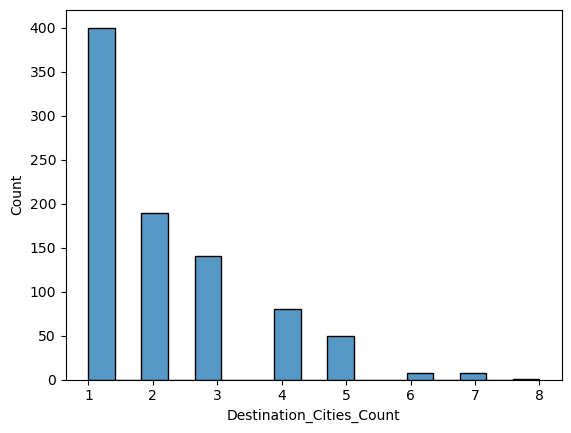

In [505]:
sns.histplot(Trips["Destination_Cities_Count"])

In [364]:
Trips["Package_Type"].value_counts()[:10]

Package_Type
Gangtok Tour Package            7
Goa Honeymoon                   5
Goa Tour Package                5
Golden Triangle Tour Package    5
Kerala Honeymoon                4
Ladakh Tour Package             4
Andaman Tour Package            4
Leh Ladakh Trip Package         3
Rajasthan Tour Package          3
Kerala Tour Package             3
Name: count, dtype: int64

In [ ]:
Trips["Package_Type"]re

In [655]:
Trips["Package_Type"].replace("Goa Tour Package","Goa Package",inplace=True)

In [657]:
Trips["Package_Type"].replace("Ooty Tour Package","Ooty Package",inplace=True)

<Axes: ylabel='Package_Type'>

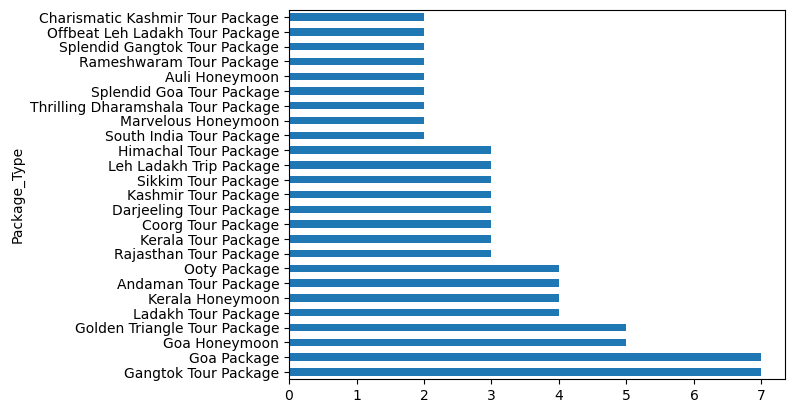

In [669]:
# catagorical column
import matplotlib.pyplot as plt
import seaborn as sns
Trips["Package_Type"].value_counts()[:25].plot(kind="barh")





AttributeError: module 'matplotlib.pyplot' has no attribute 'subtitle'

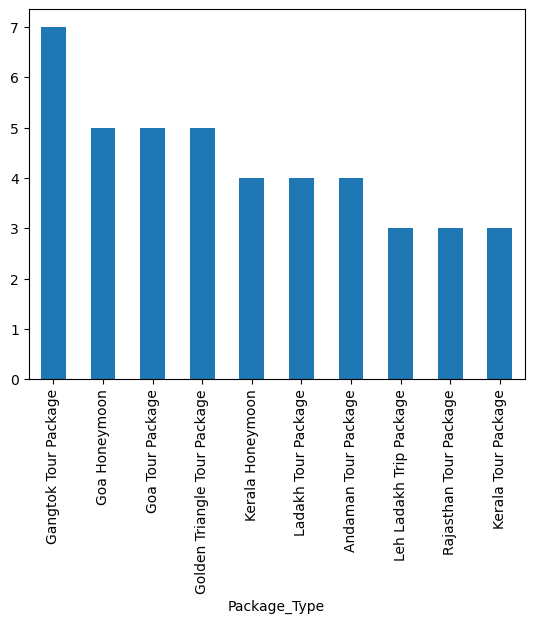

In [649]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Trips["Package_Type"].value_counts()[:10] returns the top 10 categories
Trips["Package_Type"].value_counts()[:10].plot.bar()

# Adding a title to the plot
plt.title('Top 10 Package Types')

# Display the plot
plt.show()


In [366]:
Trips[Trips["Package_Type"]=="Gangtok Tour Package"]

,Package_Type,Duration_Days,Duration_Nights,Starting_Location,Destination_Cities,Destination_Cities_Count,Included_Activities,Hotel_Ratings,Original_Price_INR,Deal_Price_INR,Discount_Percentage
246,Gangtok Tour Package,4,3,Gangtok,Gangtok,1,Temple Adventure Waterfalls Hill station Lake ...,4,43582,40095,8
295,Gangtok Tour Package,3,2,Gangtok,Gangtok,1,Scenic views Adventure Temple Nature City Tour,5,79666,74089,7
537,Gangtok Tour Package,3,2,Gangtok,Gangtok,1,Adventure Nature Hill station Luxury,5,79836,75046,6
571,Gangtok Tour Package,5,4,Gangtok,Gangtok,1,Tsomgo Lake Adventure Baba Mandir Nature,3,58109,54041,7
585,Gangtok Tour Package,4,3,Gangtok,Gangtok,1,Adventure Activities Nature Monasteries Adven...,4,28437,26731,6
634,Gangtok Tour Package,7,6,Gangtok,"Gangtok,Pelling,Darjeeling",3,Sightseeing Adventure Nature Hill station Trek...,3,80532,74089,8
661,Gangtok Tour Package,6,5,Gangtok,"Gangtok,Darjeeling",2,Tiger Hill Nature Teesta River Adventure,4,48737,45325,7


### Gangtok Tours has more packages compares to other packages. 

In [367]:
Trips["Starting_Location"].nunique()

100

In [368]:
Trips["Starting_Location"].value_counts()[:20]

Starting_Location
Munnar         61
Gangtok        52
Goa            45
Shimla         39
Srinagar       38
Leh            36
Coorg          32
Ooty           32
Manali         29
Shillong       26
Port Blair     25
Mussoorie      20
Jaipur         19
New Delhi      18
Cochin         17
Alleppey       16
Udaipur        16
Lansdowne      15
Haridwar       15
Jim Corbett    15
Name: count, dtype: int64

<Axes: ylabel='Starting_Location'>

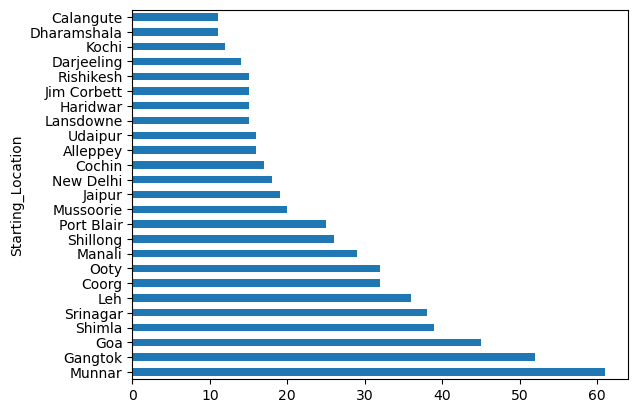

In [671]:
Trips["Starting_Location"].value_counts()[:25].plot(kind="barh")

In [373]:
Trips[Trips["Starting_Location"].str.contains("Munnar")]

,Package_Type,Duration_Days,Duration_Nights,Starting_Location,Destination_Cities,Destination_Cities_Count,Included_Activities,Hotel_Ratings,Original_Price_INR,Deal_Price_INR,Discount_Percentage
6,Hills & Houseboat: Munnar and Alleppey Honeymoon,6,5,Munnar,"Munnar,Thekkady,Alleppey,Kochi",4,Periyar Wildlife Sanctuary Cruises Eraviku...,3,23644,21280,10
12,Best Selling Kerala Houseboat & Jungle Safari ...,5,4,Munnar,"Munnar,Thekkady,Alleppey",3,Wildlife safari Adventure Backwaters Hill stat...,3,21993,17920,19
14,Top Kerala Family Tour Package,6,5,Munnar,"Munnar,Thekkady,Alleppey,Kochi",4,Pocket-friendly Cruises Scenic Routes Hill st...,3,24008,19643,18
22,Idyllic Kerala Houseboat & Hills Family Package,7,6,Munnar,"Munnar,Thekkady,Alleppey,Kovalam",4,Adventure Sightseeing Nature Family Waterfall ...,3,30249,25460,16
45,Best Selling Alleppey-Munnar Kerala Weekend Tour,4,3,Munnar,"Munnar,Alleppey",2,Spice Plantations Hill station Houseboat Sta...,3,17132,13020,24
...,...,...,...,...,...,...,...,...,...,...,...
834,An Idyllic Kochi Honeymoon,6,5,Munnar,"Munnar,Thekkady,Kumarakom,Kochi",4,Hotel check-in Adventure Breakfast Water Acti...,3,18163,16528,9
842,Ravishing Kerala Tour Package,5,4,Munnar,"Munnar,Alleppey,Cochin,Kochi",4,Ideal for families Hill station Nature walks W...,3,14983,13485,10
844,Kerala Honeymoon,7,6,Munnar,"Munnar,Thekkady,Alleppey,Kovalam",4,Culture Nature Hill station Scenic views Cultu...,3,21739,20000,8
867,A Fantastic Tour Amid ature In Munnar,4,3,Munnar,Munnar,1,Sightseeing Water Activities Adventure Activ...,3,12304,11197,9


### here more Tours are Starting from Munnar.

In [714]:
Trips.describe()


,Duration_Days,Duration_Nights,Destination_Cities_Count,Hotel_Ratings,Original_Price_INR,Deal_Price_INR,Discount_Percentage
count,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000
mean,4.724571,3.724571,2.142857,2.955429,22906.182857,20731.314286,9.514286
std,2.091888,2.091888,1.372808,0.594850,16948.742811,15389.574464,3.260360
min,2.000000,1.000000,1.000000,2.000000,2365.000000,2199.000000,1.000000
25%,3.000000,2.000000,1.000000,3.000000,12553.000000,11407.000000,8.000000
50%,4.000000,3.000000,2.000000,3.000000,17778.000000,16000.000000,9.000000
75%,6.000000,5.000000,3.000000,3.000000,27483.000000,24999.000000,9.000000
max,13.000000,12.000000,8.000000,5.000000,184615.000000,168000.000000,39.000000


In [418]:
Trips["Deal_Price_INR"].value_counts()

Deal_Price_INR
10500    13
20000    10
11500    10
10000     9
15000     9
         ..
14499     1
17399     1
16103     1
19500     1
18400     1
Name: count, Length: 517, dtype: int64

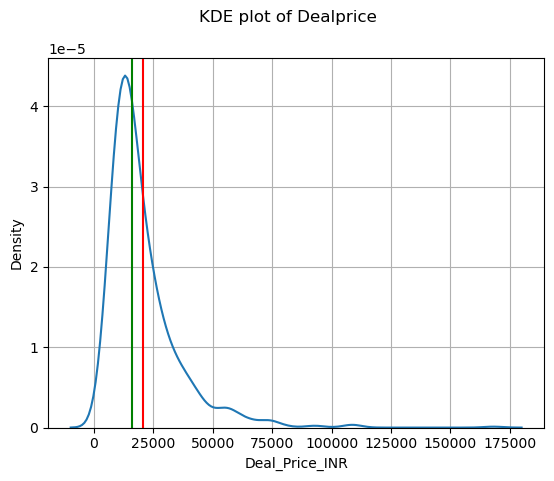

In [704]:
sns.kdeplot(x=Trips["Deal_Price_INR"])
plt.axvline(Trips["Deal_Price_INR"].mean(),color="r")
plt.axvline(Trips["Deal_Price_INR"].median(),color="g")
plt.suptitle("KDE plot of Dealprice")
plt.grid()

In [708]:
Trips["Deal_Price_INR"].mean()

20731.314285714285

In [710]:
Trips["Deal_Price_INR"].median()

16000.0

In [712]:
Trips["Deal_Price_INR"].max()

168000

<Axes: xlabel='Destination_Cities_Count'>

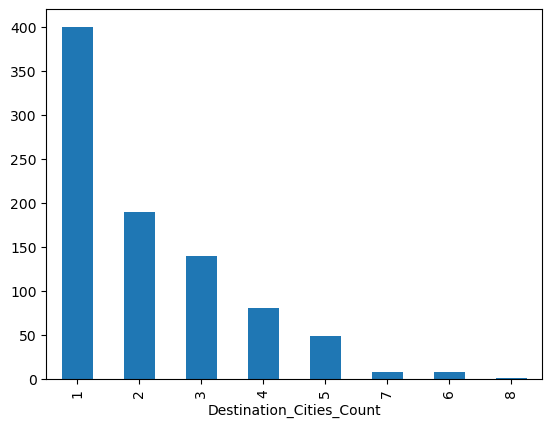

In [422]:
Trips["Destination_Cities_Count"].value_counts().plot(kind="bar")


<Axes: xlabel='Destination_Cities_Count', ylabel='count'>

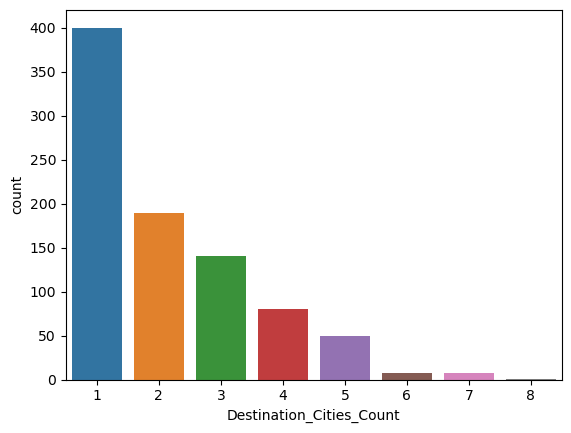

In [426]:
sns.countplot(data=Trips,x="Destination_Cities_Count")

<Axes: ylabel='count'>

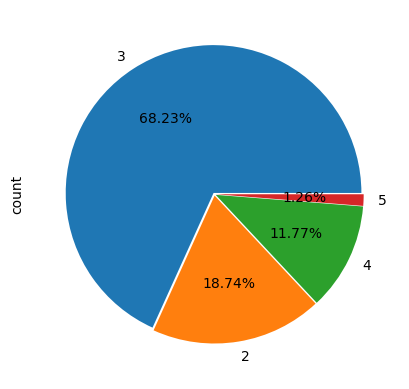

In [417]:
Trips["Hotel_Ratings"].value_counts().plot(kind="pie",autopct="%.2f%%",explode=[0.01,0.01,0.01,0.01])

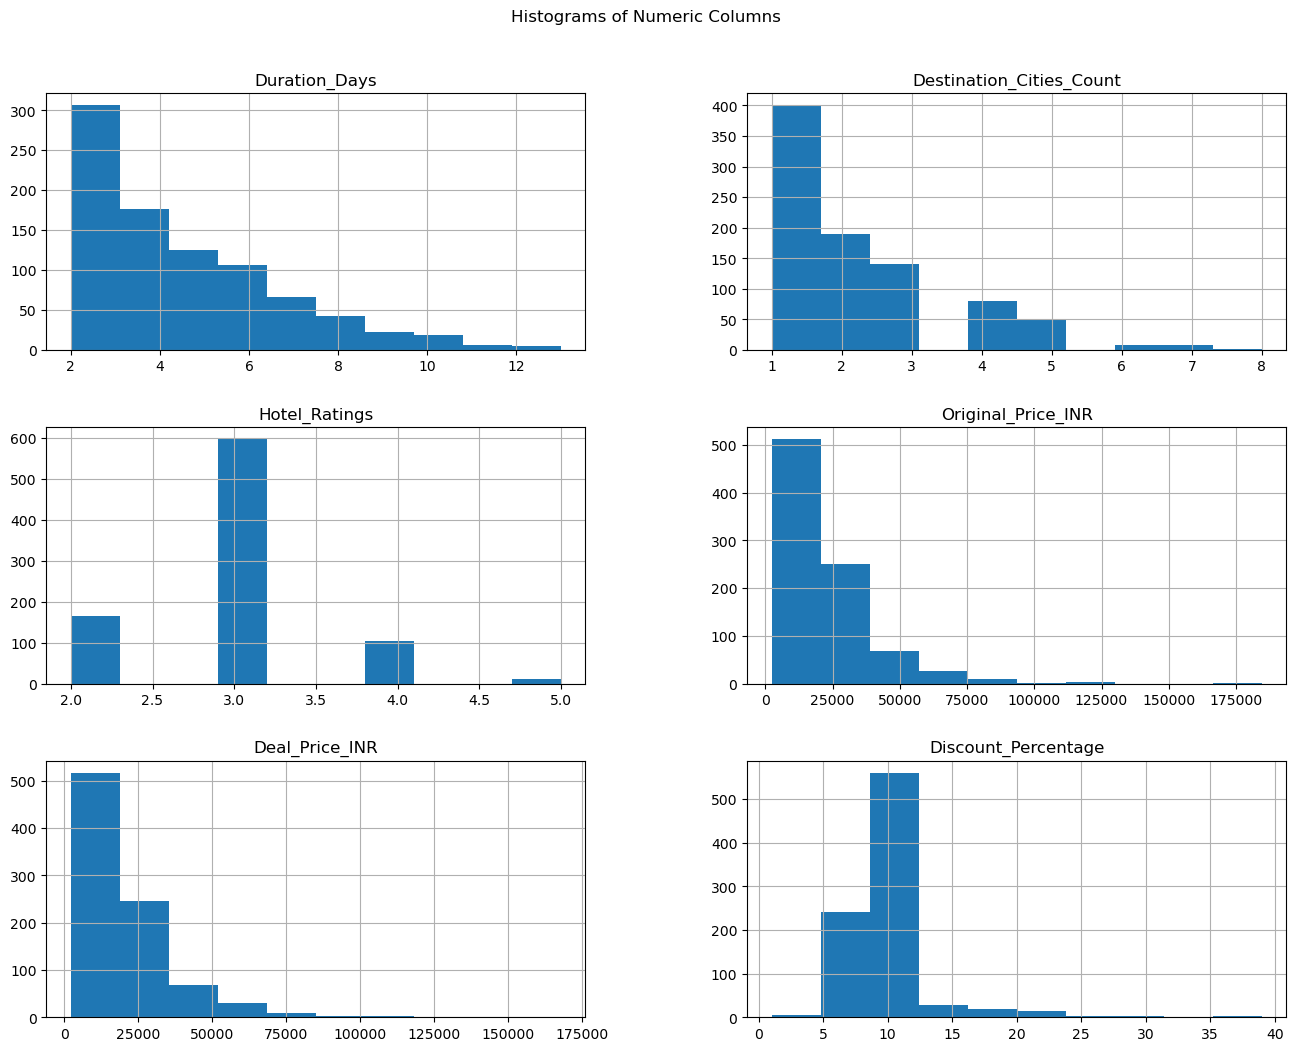

In [636]:
numeric_cols = ['Duration_Days', 'Destination_Cities_Count','Hotel_Ratings', 'Original_Price_INR', 'Deal_Price_INR', 'Discount_Percentage']
Trips[numeric_cols].hist(figsize=(16, 12))
plt.suptitle('Histograms of Numeric Columns', y=0.95)
plt.show()

In [390]:
Trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875 entries, 0 to 874
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Package_Type              875 non-null    object
 1   Duration_Days             875 non-null    int64 
 2   Duration_Nights           875 non-null    int64 
 3   Starting_Location         875 non-null    object
 4   Destination_Cities        875 non-null    object
 5   Destination_Cities_Count  875 non-null    int64 
 6   Included_Activities       875 non-null    object
 7   Hotel_Ratings             875 non-null    int64 
 8   Original_Price_INR        875 non-null    int64 
 9   Deal_Price_INR            875 non-null    int64 
 10  Discount_Percentage       875 non-null    int64 
dtypes: int64(7), object(4)
memory usage: 75.3+ KB


## Now checking the outliers.

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

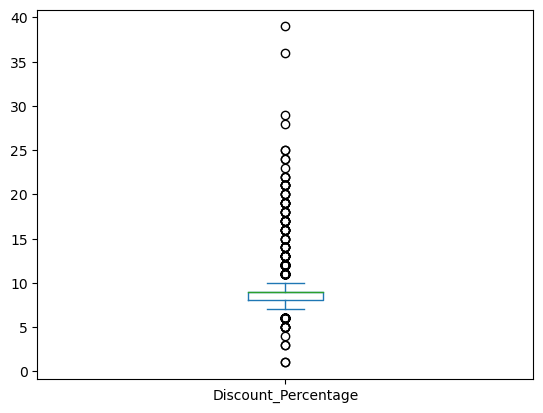

In [19]:
Trips["Discount_Percentage"].plot(kind="box")

<Axes: >

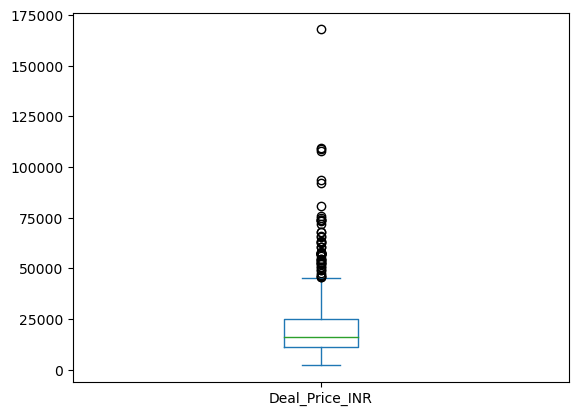

In [20]:
Trips["Deal_Price_INR"].plot(kind="box")

<Axes: >

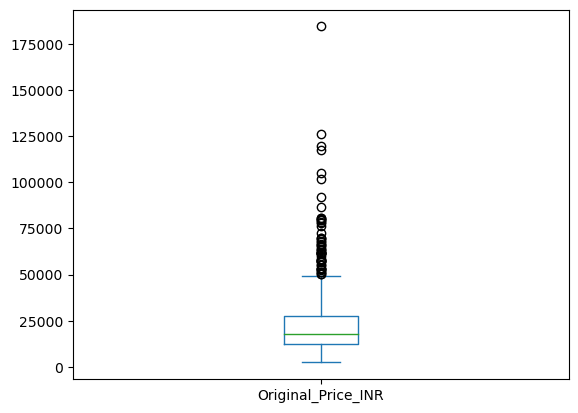

In [21]:
Trips["Original_Price_INR"].plot(kind="box")

<Axes: >

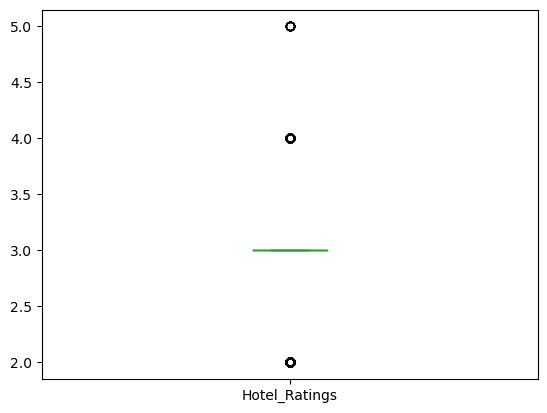

In [252]:
Trips["Hotel_Ratings"].plot(kind="box")

<Axes: >

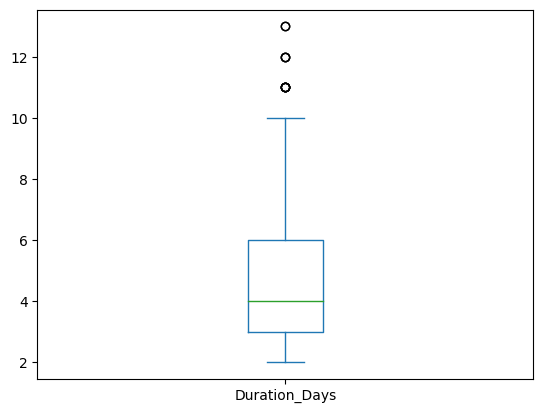

In [253]:
Trips["Duration_Days"].plot(kind="box")

<Axes: >

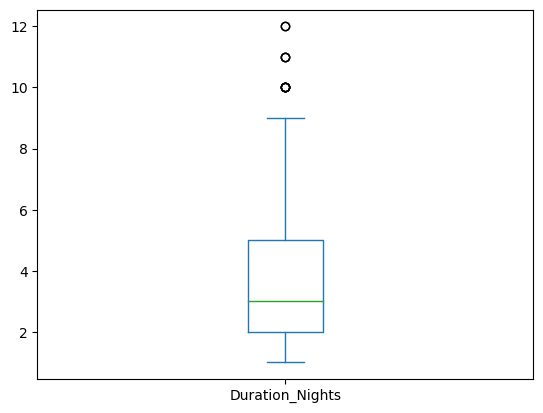

In [254]:
Trips["Duration_Nights"].plot(kind="box")

In [677]:
Trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875 entries, 0 to 874
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Package_Type              875 non-null    object
 1   Duration_Days             875 non-null    int64 
 2   Duration_Nights           875 non-null    int64 
 3   Starting_Location         875 non-null    object
 4   Destination_Cities        875 non-null    object
 5   Destination_Cities_Count  875 non-null    int64 
 6   Included_Activities       875 non-null    object
 7   Hotel_Ratings             875 non-null    int64 
 8   Original_Price_INR        875 non-null    int64 
 9   Deal_Price_INR            875 non-null    int64 
 10  Discount_Percentage       875 non-null    int64 
dtypes: int64(7), object(4)
memory usage: 75.3+ KB


Text(0.5, 0.98, 'Box Plot of Duration_Dayse , Destination_Cities_Count and Discount_Percentage')

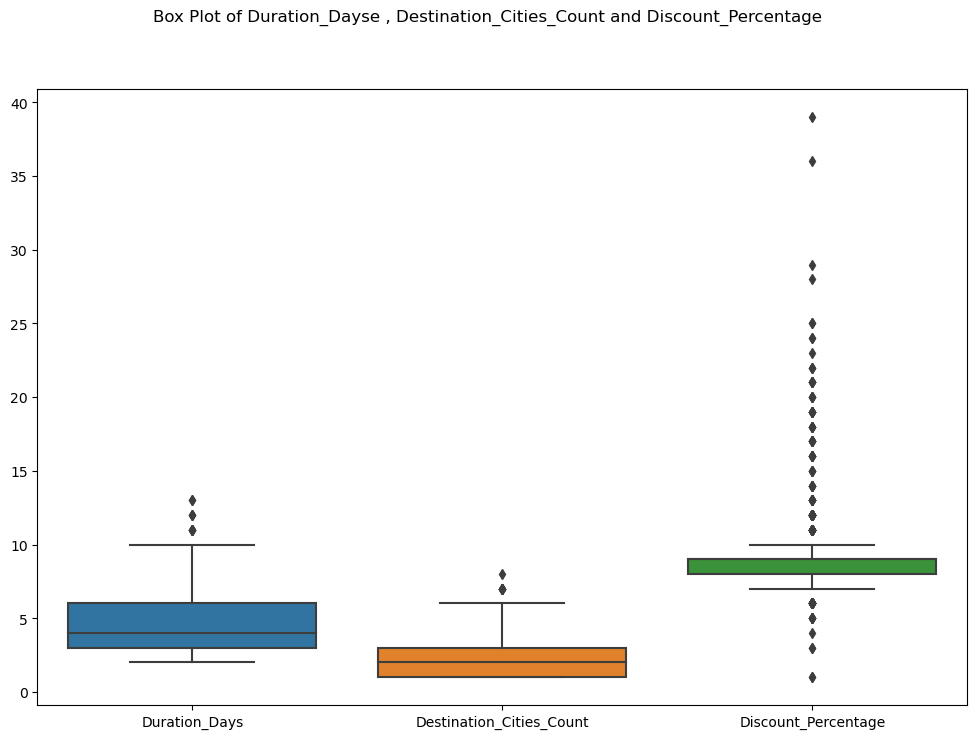

In [691]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=Trips[['Duration_Days', 'Destination_Cities_Count','Discount_Percentage']])
plt.suptitle('Box Plot of Duration_Dayse , Destination_Cities_Count and Discount_Percentage')


In [238]:
q1=Trips["Duration_Days"].quantile(0.25)
q3=Trips["Duration_Days"].quantile(0.75)

In [240]:
IQR=q3-q1
IQR

3.0

In [244]:
ll=q1-(1.5*IQR)
ul=q3+(1.5*IQR)

In [245]:
ll,ul

(-1.5, 10.5)

In [251]:
Trips[~((Trips["Duration_Days"]<ll) | (Trips["Duration_Days"]>ul))]

,Package_Type,Duration_Days,Duration_Nights,Starting_Location,Destination_Cities,Included_Activities,Hotel_Ratings,Original_Price_INR,Deal_Price_INR,Discount_Percentage
0,Most Reasonable Goa Honeymoon,5,4,Goa,Goa,Hot Pick Water Activities Romantic Cruise,2,12571,11000,12
1,Fantastic Andaman Honeymoon,5,4,Port Blair,"PortBlair,Havelock",Corbyn's Beach Cove Adventure Radhanagar Be...,3,18811,15599,17
2,Romantic Mussoorie Tour Package,3,2,Mussoorie,Mussoorie,Sightseeing Nature Hill station Himalayas Roma...,3,12000,10500,13
3,Coorg Package,3,2,Coorg,Coorg,Coorg sightseeing Adventure Rajas Seat Nature...,3,17802,16200,9
4,Best Andaman Sightseeing Tour Package,5,4,Port Blair,"PortBlair,Havelock",Cellular Jail Light & Sound Show Adventure,3,36484,33200,9
...,...,...,...,...,...,...,...,...,...,...
870,A Fun Filled Trip To Madhya Pradesh,6,5,Jabalpur,"Jabalpur,KanhaNationalPark,Pachmarhi",National Park Nature Sightseeing Tours Water,3,29780,27100,9
871,Golden Triangle Tour Package,2,1,New Delhi,NewDelhi,Adventure Nature Religious Budget,3,11702,11000,6
872,Alluring Assam Sightseeing Tour Package,6,5,Kaziranga,"Kaziranga,Shillong,Guwahati",Sightseeing Historical Kaziranga National Pa...,2,31318,28499,9
873,Top-Selling Chennai Sightseeing Package,3,2,Chennai,"Chennai,Mahabalipuram",Temple Religiousart gallery Historical Marina ...,3,16959,15433,9


In [22]:
Trips

,Package_Type,Duration_Days,Duration_Nights,Starting_Location,Destination_Cities,Included_Activities,Hotel_Ratings,Original_Price_INR,Deal_Price_INR,Discount_Percentage
0,Most Reasonable Goa Honeymoon,5,4,Goa,Goa,Hot Pick Water Activities Romantic Cruise,2,12571,11000,12
1,Fantastic Andaman Honeymoon,5,4,Port Blair,"Port Blair ,Havelock",Corbyn's Beach Cove Adventure Radhanagar Be...,3,18811,15599,17
2,Romantic Mussoorie Tour Package,3,2,Mussoorie,Mussoorie,Sightseeing Nature Hill station Himalayas Roma...,3,12000,10500,13
3,Coorg Package,3,2,Coorg,Coorg,Coorg sightseeing Adventure Raja Seat Nature A...,3,17802,16200,9
4,Best Andaman Sightseeing Tour Package,5,4,Port Blair,"Port Blair ,Havelock",Cellular Jail Light & Sound Show Adventure,3,36484,33200,9
...,...,...,...,...,...,...,...,...,...,...
870,A Fun Filled Trip To Madhya Pradesh,6,5,Jabalpur,"Jabalpur ,Kanha National Park ,Pachmarhi",National Park Nature Sightseeing Tours Water,3,29780,27100,9
871,Golden Triangle Tour Package,2,1,New Delhi,New Delhi,Adventure Nature Religious Budget,3,11702,11000,6
872,Alluring Assam Sightseeing Tour Package,6,5,Kaziranga,"Kaziranga ,Shillong ,Guwahati",Sightseeing Historical Kaziranga National Pa...,2,31318,28499,9
873,Top-Selling Chennai Sightseeing Package,3,2,Chennai,"Chennai ,Mahabalipuram",Temple Religiousart gallery Historical Marina ...,3,16959,15433,9


# Bivariate  analysis

In [428]:
Trips

,Package_Type,Duration_Days,Duration_Nights,Starting_Location,Destination_Cities,Destination_Cities_Count,Included_Activities,Hotel_Ratings,Original_Price_INR,Deal_Price_INR,Discount_Percentage
0,Most Reasonable Goa Honeymoon,5,4,Goa,Goa,1,Hot Pick Water Activities Romantic Cruise,2,12571,11000,12
1,Fantastic Andaman Honeymoon,5,4,Port Blair,"PortBlair,Havelock",2,Corbyn's Beach Cove Adventure Radhanagar Be...,3,18811,15599,17
2,Romantic Mussoorie Tour Package,3,2,Mussoorie,Mussoorie,1,Sightseeing Nature Hill station Himalayas Roma...,3,12000,10500,13
3,Coorg Package,3,2,Coorg,Coorg,1,Coorg sightseeing Adventure Rajas Seat Nature...,3,17802,16200,9
4,Best Andaman Sightseeing Tour Package,5,4,Port Blair,"PortBlair,Havelock",2,Cellular Jail Light & Sound Show Adventure,3,36484,33200,9
...,...,...,...,...,...,...,...,...,...,...,...
870,Golden Triangle Tour Package,2,1,New Delhi,NewDelhi,1,Adventure Nature Religious Budget,3,11702,11000,6
871,Alluring Assam Sightseeing Tour Package,6,5,Kaziranga,"Kaziranga,Shillong,Guwahati",3,Sightseeing Historical Kaziranga National Pa...,2,31318,28499,9
872,Top-Selling Chennai Sightseeing Package,3,2,Chennai,"Chennai,Mahabalipuram",2,Temple Religiousart gallery Historical Marina ...,3,16959,15433,9
873,Spectacular Shillong Holiday Package,3,2,Shillong,Shillong,1,Sightseeing Nature Temples Adventure Hills Hil...,3,13736,12500,9


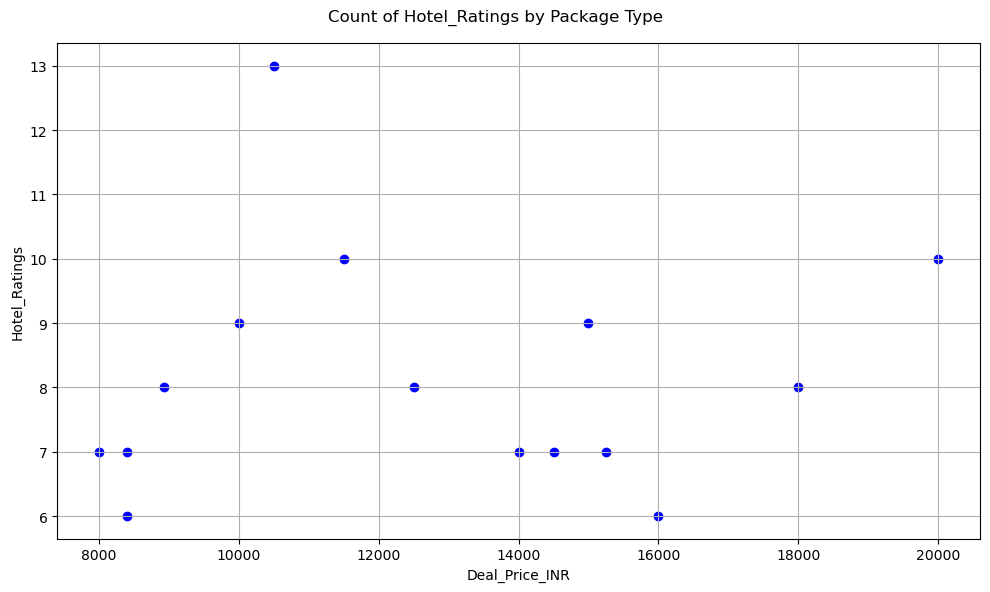

In [699]:
grouped_data = Trips.groupby("Deal_Price_INR")[["Hotel_Ratings"]].count().sort_values(by="Hotel_Ratings", ascending=False)[:15]


x = grouped_data.index
y = grouped_data["Hotel_Ratings"]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue')
plt.suptitle('Count of Hotel_Ratings by Package Type')
plt.xlabel('Deal_Price_INR')
plt.ylabel('Hotel_Ratings')
plt.xticks(rotation=0 )
plt.grid(True)
plt.tight_layout()
plt.show()

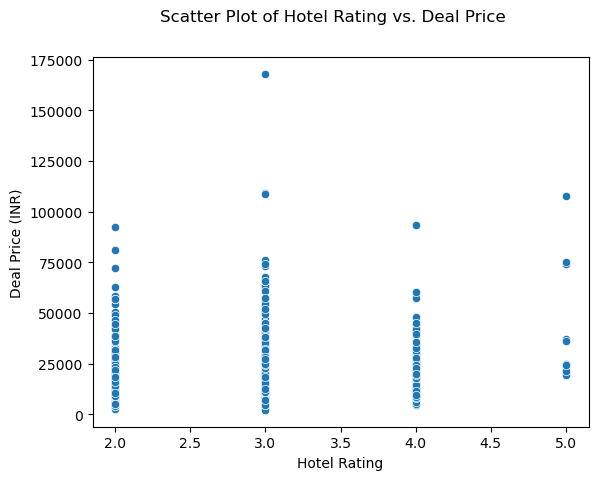

In [703]:
sns.scatterplot(x='Hotel_Ratings', y='Deal_Price_INR', data=Trips)

# Adding titles and labels
plt.suptitle('Scatter Plot of Hotel Rating vs. Deal Price')
plt.xlabel('Hotel Rating')
plt.ylabel('Deal Price (INR)')

# Show plot
plt.show()

In [490]:
Trips.groupby("Destination_Cities_Count")[["Deal_Price_INR"]].count()

,Deal_Price_INR
Destination_Cities_Count,
1,400
2,189
3,140
4,80
5,49
6,8
7,8
8,1


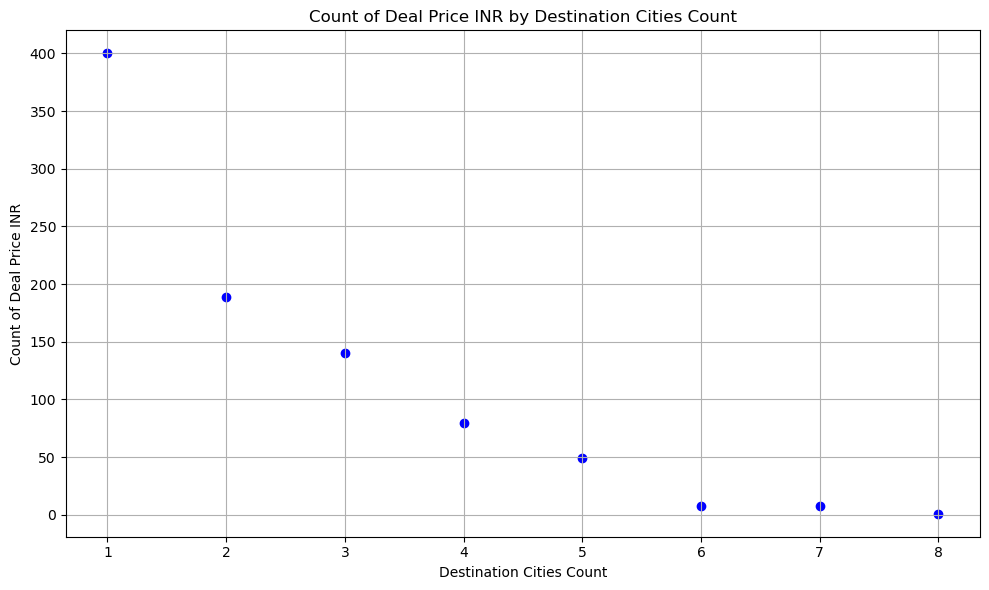

In [492]:
grouped_data = Trips.groupby("Destination_Cities_Count")["Deal_Price_INR"].count()

# Extracting x and y data
x = grouped_data.index
y = grouped_data.values

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue')
plt.title('Count of Deal Price INR by Destination Cities Count')
plt.xlabel('Destination Cities Count')
plt.ylabel('Count of Deal Price INR')
plt.grid(True)
plt.tight_layout()
plt.show()

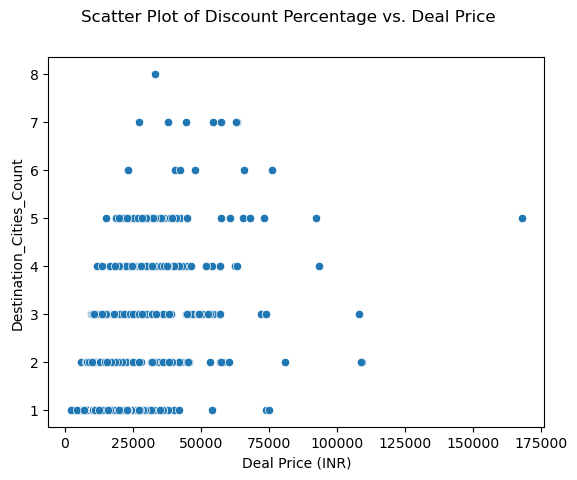

In [676]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Trips' is your DataFrame containing 'Discount_Percentage' and 'Deal_Price_INR' columns
sns.scatterplot(x='Deal_Price_INR', y='Destination_Cities_Count', data=Trips)

# Adding titles and labels
plt.suptitle('Scatter Plot of Discount Percentage vs. Deal Price')
plt.xlabel('Deal Price (INR)')
plt.ylabel('Destination_Cities_Count')

# Show plot
plt.show()


In [503]:
Trips.groupby("Destination_Cities_Count")[["Deal_Price_INR"]].count()

,Deal_Price_INR
Destination_Cities_Count,
1,400
2,189
3,140
4,80
5,49
6,8
7,8
8,1


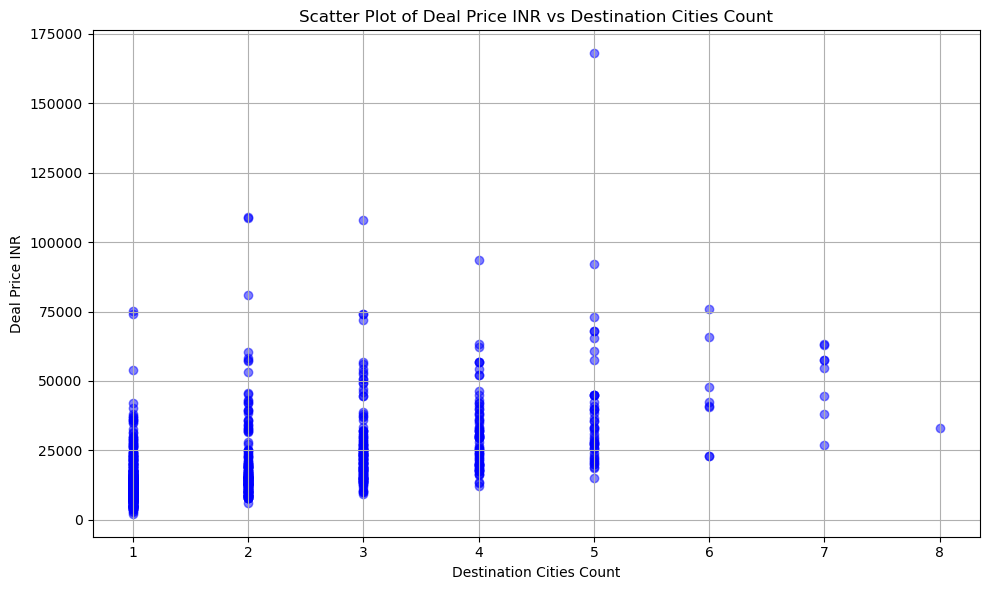

In [501]:
plt.figure(figsize=(10, 6))
plt.scatter(Trips["Destination_Cities_Count"], Trips["Deal_Price_INR"], color='blue', alpha=0.5)
plt.title('Scatter Plot of Deal Price INR vs Destination Cities Count')
plt.xlabel('Destination Cities Count')
plt.ylabel('Deal Price INR')
plt.grid(True)
plt.tight_layout()
plt.show()

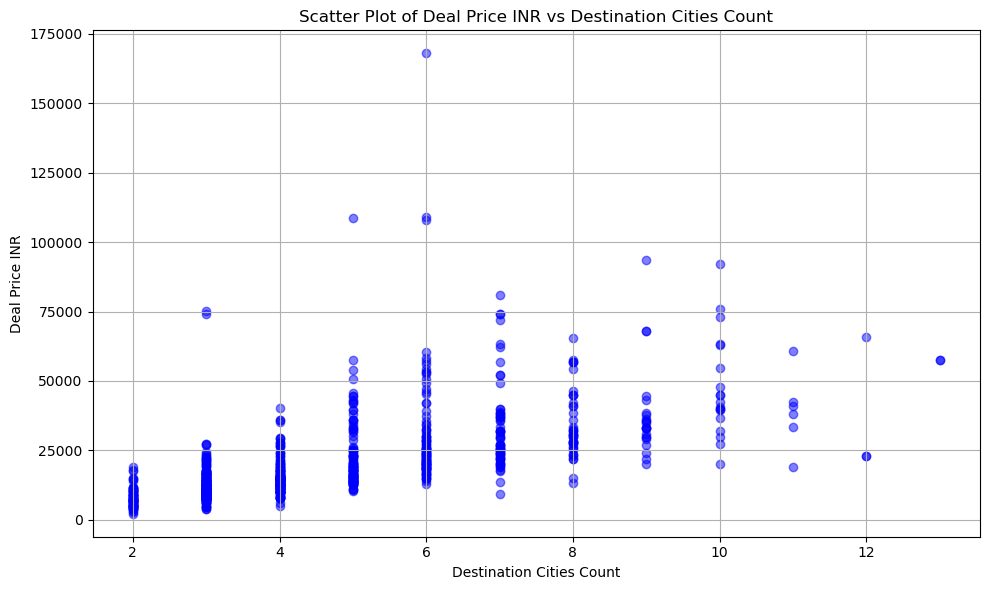

In [504]:
plt.figure(figsize=(10, 6))
plt.scatter(Trips["Duration_Days"], Trips["Deal_Price_INR"], color='blue', alpha=0.5)
plt.title('Scatter Plot of Deal Price INR vs Destination Cities Count')
plt.xlabel('Destination Cities Count')
plt.ylabel('Deal Price INR')
plt.grid(True)
plt.tight_layout()
plt.show()

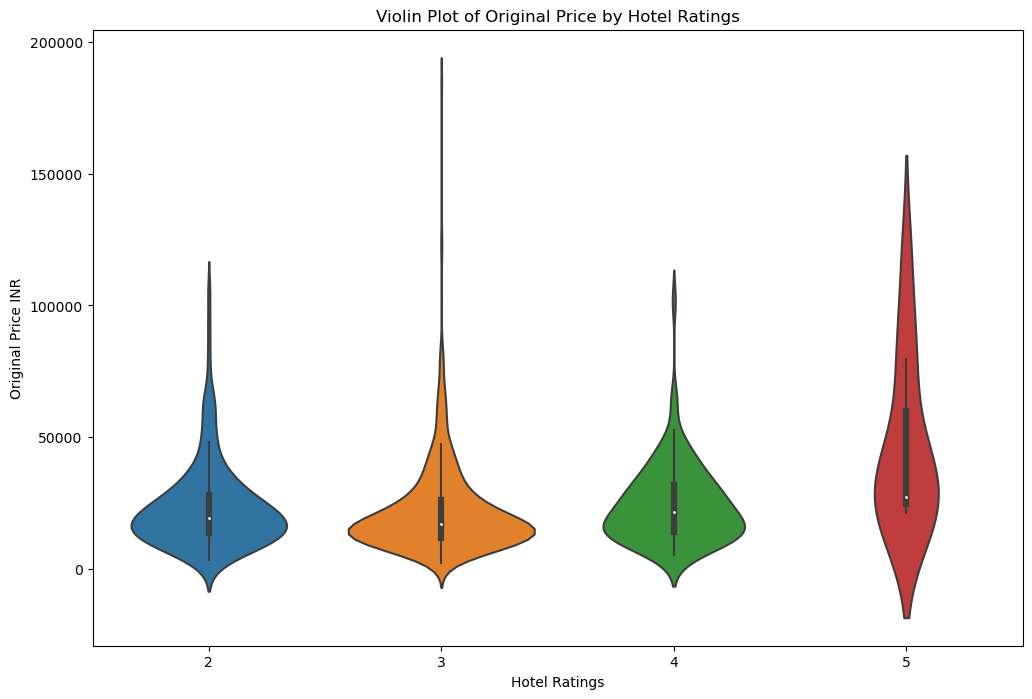

In [544]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Hotel_Ratings', y='Original_Price_INR', data=Trips)
plt.title('Violin Plot of Original Price by Hotel Ratings')
plt.xlabel('Hotel Ratings')
plt.ylabel('Original Price INR')
plt.show()

# Multivariate analysis

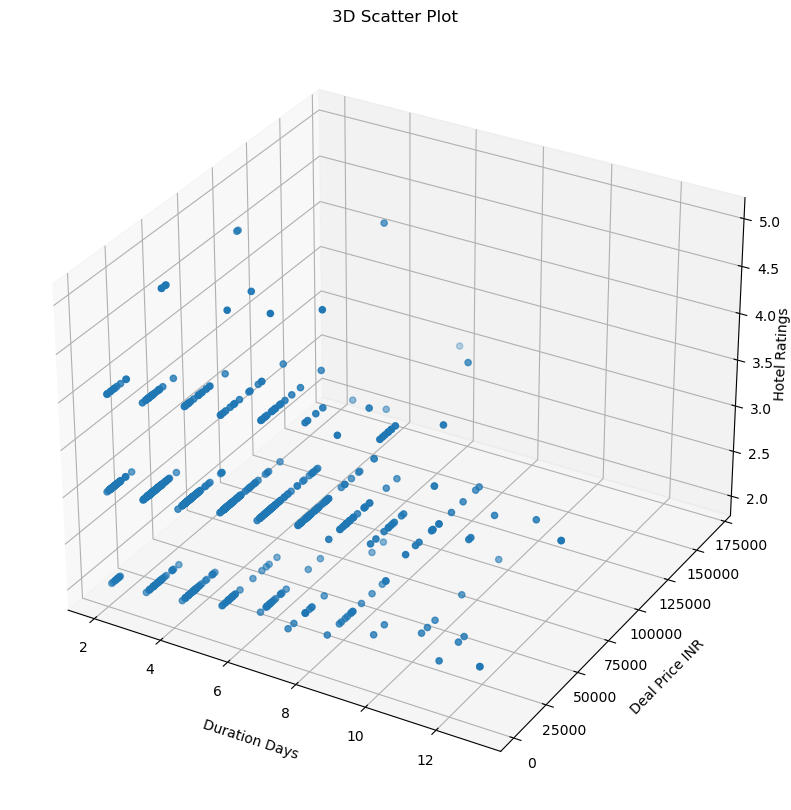

In [545]:

fig = plt.figure(figsize=(11, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(Trips['Duration_Days'], Trips['Deal_Price_INR'], Trips['Hotel_Ratings'])
ax.set_xlabel('Duration Days')
ax.set_ylabel('Deal Price INR')
ax.set_zlabel('Hotel Ratings')
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10  
ax.zaxis.labelpad = -1
plt.title('3D Scatter Plot')
plt.show()

C:\Users\shrav\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


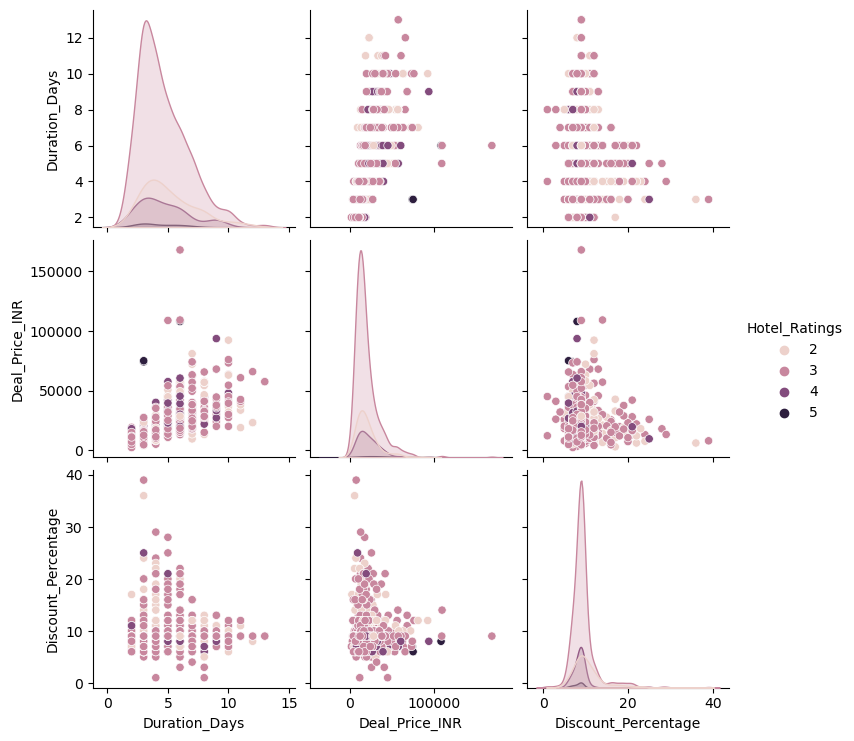

In [705]:
sns.pairplot(Trips[['Duration_Days', 'Deal_Price_INR', 'Discount_Percentage', 'Hotel_Ratings']], hue='Hotel_Ratings')

plt.show()

In [ ]:
plt.title('Scatter Plot Matrix with Hue by Hotel Ratings',loc="right",rotation=90)

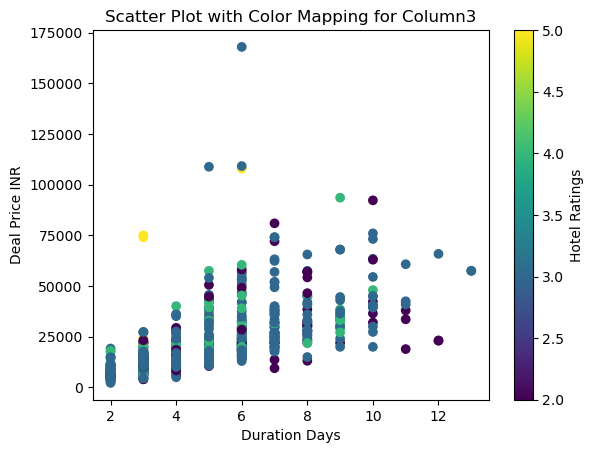

In [576]:
x = Trips['Duration_Days']
y = Trips['Deal_Price_INR']
z = Trips['Hotel_Ratings']



plt.scatter(x, y, c=z, cmap='viridis')
plt.colorbar(label='Hotel Ratings')  
plt.xlabel('Duration Days')
plt.ylabel('Deal Price INR')
plt.title('Scatter Plot with Color Mapping for Column3')
plt.show()

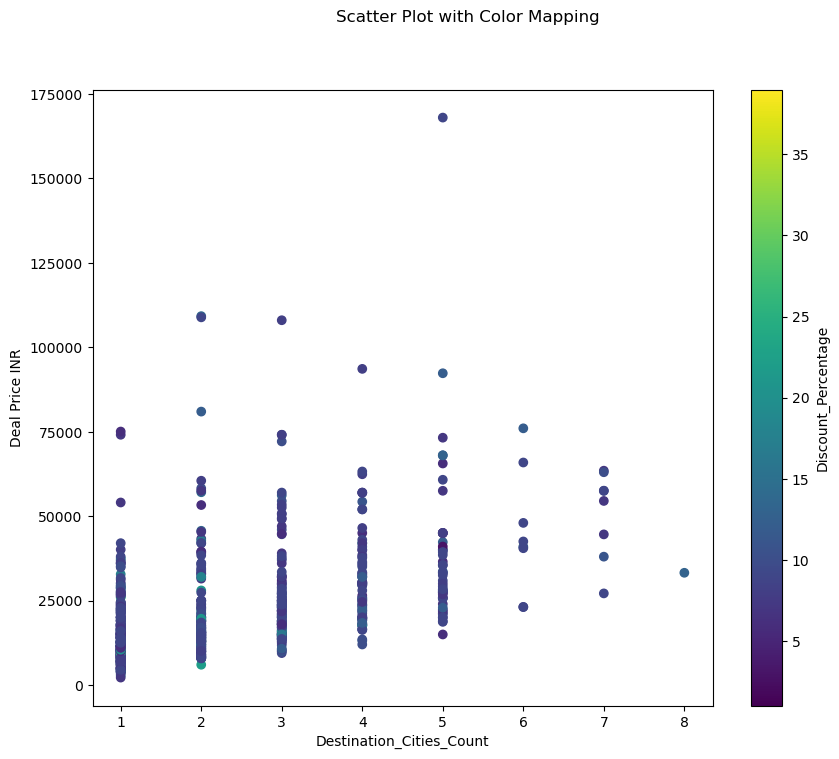

In [707]:
x = Trips['Destination_Cities_Count']
y = Trips['Deal_Price_INR']
z = Trips['Discount_Percentage']


plt.figure(figsize=(10, 8))
plt.scatter(x, y, c=z, cmap='viridis')
plt.colorbar(label="Discount_Percentage")  
plt.xlabel('Destination_Cities_Count')
plt.ylabel('Deal Price INR')
plt.suptitle('Scatter Plot with Color Mapping')
plt.show()